In [27]:
import keras
import pandas as pd
from keras import Sequential
from keras.layers import LSTM,Dense,Dropout, Embedding, Conv1D, MaxPooling1D, Flatten
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

%matplotlib inline

In [2]:
def load_imdb(path):
    from bs4 import BeautifulSoup
    import re, json
    import pandas as pd
    
    def preprocess(text):
        text = BeautifulSoup(text.lower(), "html5lib").text #removed html tags
        text = re.sub(r"[\W]+", " ", text)
        return text
    
    with open(path, "r", encoding="utf8") as f:
        comments = pd.DataFrame.from_dict([json.loads(l) for l in f])
        comments["content"] = comments["content"].apply(preprocess)
        return comments
        
comments = load_imdb("/data/imdb-comments.json")
comments.head()

,content,label,name,sentiment
0,i went and saw this movie last night after bei...,test,0_10.txt,pos
1,actor turned director bill paxton follows up h...,test,10000_7.txt,pos
2,as a recreational golfer with some knowledge o...,test,10001_9.txt,pos
3,i saw this film in a sneak preview and it is d...,test,10002_8.txt,pos
4,bill paxton has taken the true story of the 19...,test,10003_8.txt,pos


In [3]:
comments.sample(10)

,content,label,name,sentiment
46875,what an utter disappointment the score of 6 1 ...,train,7189_4.txt,neg
14363,the movie uses random events of historical sig...,test,11678_2.txt,neg
48591,possible plot spoilers i adore dennis hopper ...,train,8733_1.txt,neg
18123,i first heard of this movie at the flashback w...,test,3811_4.txt,neg
10112,this is a good movie i won t go into any detai...,test,7852_8.txt,pos
11553,this film is a good start for novices that hav...,test,9149_8.txt,pos
10802,a masterful performance by jamie foxx is just ...,test,8473_9.txt,pos
315,an obsessive love story where the characters h...,test,10284_9.txt,pos
39764,does anything at all happen in this movie ther...,train,12038_4.txt,neg
1742,ok the show was a little uneven but i still lo...,test,11569_7.txt,pos


In [4]:
y = np.where(comments.sentiment == "pos", 1, 0)
is_training = comments.label == "train"

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comments.content)
doc_terms = tokenizer.texts_to_sequences(comments.content)
len(doc_terms)

50000

In [6]:
comments.content[0]

'i went and saw this movie last night after being coaxed to by a few friends of mine i ll admit that i was reluctant to see it because from what i knew of ashton kutcher he was only able to do comedy i was wrong kutcher played the character of jake fischer very well and kevin costner played ben randall with such professionalism the sign of a good movie is that it can toy with our emotions this one did exactly that the entire theater which was sold out was overcome by laughter during the first half of the movie and were moved to tears during the second half while exiting the theater i not only saw many women in tears but many full grown men as well trying desperately not to let anyone see them crying this movie was great and i suggest that you go see it before you judge '

In [7]:
print(doc_terms[0])

[9, 416, 2, 210, 10, 15, 238, 311, 100, 109, 28203, 5, 33, 3, 173, 352, 4, 1758, 9, 232, 975, 11, 9, 13, 5735, 5, 65, 7, 84, 37, 47, 9, 672, 4, 9942, 9315, 24, 13, 62, 477, 5, 78, 201, 9, 13, 356, 9315, 254, 1, 104, 4, 3373, 15901, 53, 69, 2, 1621, 7132, 254, 1155, 8399, 17, 139, 11306, 1, 2016, 4, 3, 49, 15, 6, 11, 7, 50, 2970, 17, 258, 1334, 10, 28, 117, 619, 11, 1, 442, 764, 61, 13, 2986, 43, 13, 3232, 33, 2142, 303, 1, 88, 304, 4, 1, 15, 2, 71, 1649, 5, 1716, 303, 1, 338, 304, 136, 11778, 1, 764, 9, 23, 62, 210, 107, 362, 8, 1716, 18, 107, 364, 2061, 339, 14, 69, 264, 2816, 23, 5, 276, 246, 65, 92, 2488, 10, 15, 13, 80, 2, 9, 1466, 11, 20, 141, 65, 7, 161, 20, 1671]


In [8]:
words_by_index = dict([(i, word) for word, i in tokenizer.word_index.items()])

In [9]:
print([words_by_index[t] for t in doc_terms[0]])

['i', 'went', 'and', 'saw', 'this', 'movie', 'last', 'night', 'after', 'being', 'coaxed', 'to', 'by', 'a', 'few', 'friends', 'of', 'mine', 'i', 'll', 'admit', 'that', 'i', 'was', 'reluctant', 'to', 'see', 'it', 'because', 'from', 'what', 'i', 'knew', 'of', 'ashton', 'kutcher', 'he', 'was', 'only', 'able', 'to', 'do', 'comedy', 'i', 'was', 'wrong', 'kutcher', 'played', 'the', 'character', 'of', 'jake', 'fischer', 'very', 'well', 'and', 'kevin', 'costner', 'played', 'ben', 'randall', 'with', 'such', 'professionalism', 'the', 'sign', 'of', 'a', 'good', 'movie', 'is', 'that', 'it', 'can', 'toy', 'with', 'our', 'emotions', 'this', 'one', 'did', 'exactly', 'that', 'the', 'entire', 'theater', 'which', 'was', 'sold', 'out', 'was', 'overcome', 'by', 'laughter', 'during', 'the', 'first', 'half', 'of', 'the', 'movie', 'and', 'were', 'moved', 'to', 'tears', 'during', 'the', 'second', 'half', 'while', 'exiting', 'the', 'theater', 'i', 'not', 'only', 'saw', 'many', 'women', 'in', 'tears', 'but', 'ma

In [10]:
vocab_size = len(tokenizer.word_index)
vocab_size

103890

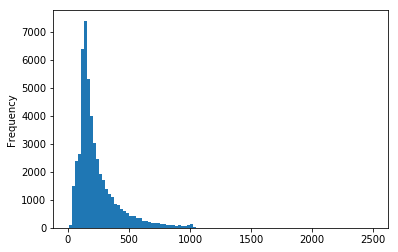

In [33]:
pd.Series([len(r) for r in doc_terms]).plot.hist(bins = 100)

In [40]:
maxlen = 1000
doc_terms_padded = pad_sequences(doc_terms, maxlen=maxlen)
doc_terms_padded[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
tf.set_random_seed(1)
np.random.seed(1)

model = Sequential()
model.add(Embedding(maxlen + 1, 10, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='tanh'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(128, 3, activation='tanh'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(128))
model.add(Dense(400, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
model.fit(doc_terms_padded[is_training], y[is_training]
          , validation_data=(doc_terms_padded[~is_training], y[~is_training])
          , batch_size=64
          , epochs=100)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 1000, 10)          10010     
_________________________________________________________________
dropout_13 (Dropout)         (None, 1000, 10)          0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 996, 64)           3264      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 249, 64)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 247, 128)          24704     
_________________________________________________________________
max_pooling1d_18 (MaxPooling (None, 61, 128)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               131584    
__________

25000/25000 [==============================] - 44s 2ms/step - loss: 0.2822 - acc: 0.8786 - val_loss: 0.3716 - val_acc: 0.8444
Epoch 49/100
25000/25000 [==============================] - 44s 2ms/step - loss: 0.2855 - acc: 0.8779 - val_loss: 0.3565 - val_acc: 0.8447
Epoch 50/100
25000/25000 [==============================] - 44s 2ms/step - loss: 0.2831 - acc: 0.8779 - val_loss: 0.3643 - val_acc: 0.8450
Epoch 51/100
25000/25000 [==============================] - 44s 2ms/step - loss: 0.2851 - acc: 0.8771 - val_loss: 0.3571 - val_acc: 0.8460
Epoch 52/100
25000/25000 [==============================] - 44s 2ms/step - loss: 0.2891 - acc: 0.8736 - val_loss: 0.3660 - val_acc: 0.8468
Epoch 53/100
25000/25000 [==============================] - 44s 2ms/step - loss: 0.2848 - acc: 0.8784 - val_loss: 0.3521 - val_acc: 0.8458
Epoch 54/100
25000/25000 [==============================] - 44s 2ms/step - loss: 0.2862 - acc: 0.8764 - val_loss: 0.3492 - val_acc: 0.8470
Epoch 55/100
25000/25000 [==============